In [1]:

# import graphviz
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import metrics, tree
from imblearn.over_sampling import SMOTE #For over sampling
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, mean_squared_error, r2_score
from sklearn.feature_selection import mutual_info_classif # Library to compute information gain
from collections import Counter
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder, label_binarize
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, roc_curve, auc, roc_auc_score
from sklearn.ensemble import AdaBoostClassifier #Used everywhere.
from sklearn.metrics import matthews_corrcoef #MCC  used everywhere


#Models
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.model_selection import train_test_split,GridSearchCV
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

sns.set_theme(color_codes=True)

In [2]:
# data = pd.read_excel(r"./geotechnical data.xlsx")
df = pd.read_excel(r"D:/SHARING PROJECTS/CHIETA/CHATBOT/dataset.xlsx")
df.head()

,KEYWORDS,Purpose
0,Bursaries,Bursaries
1,Scholarships,Bursaries
2,Grants,Bursaries
3,Fellowships,Bursaries
4,Financial Aid,Bursaries


In [3]:
df.columns

Index(['KEYWORDS', 'Purpose'], dtype='object')

## Exploratory data analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4021 entries, 0 to 4020
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   KEYWORDS  4021 non-null   object
 1   Purpose   4021 non-null   object
dtypes: object(2)
memory usage: 63.0+ KB


In [6]:
df.select_dtypes(include="object").nunique()

KEYWORDS    3492
Purpose        8
dtype: int64

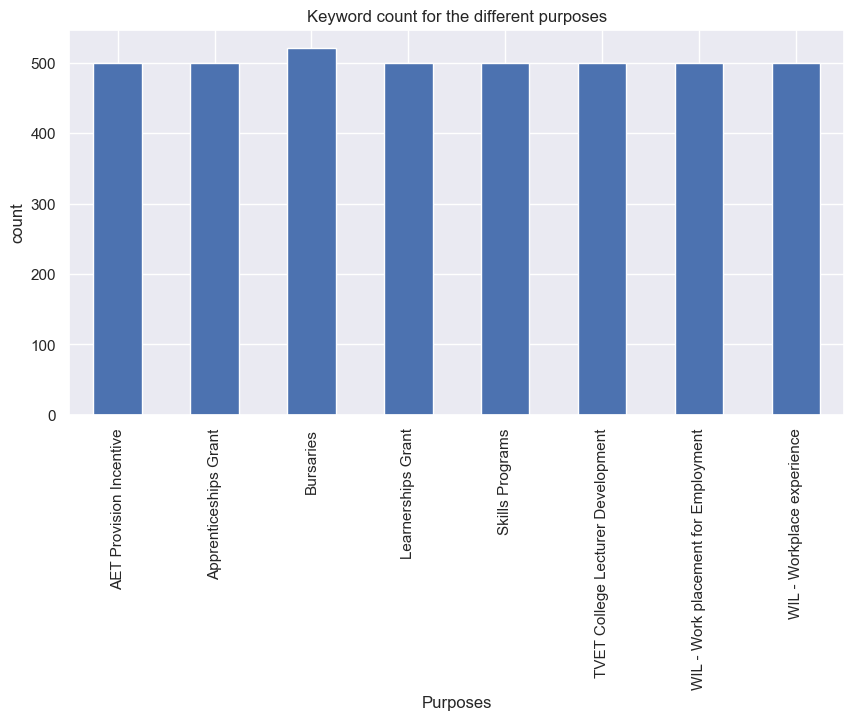

In [7]:
# Select only categorical columns
data = df.select_dtypes(include="object")

ax = data['Purpose'].value_counts().sort_index()
ax.plot(kind='bar',
          title='Keyword count for the different purposes',
        xlabel='Purposes',
        ylabel='count',
          figsize=(10, 5))
# print("Quantity value count: \n", ax)
plt.show()

In [8]:
data.describe()

,KEYWORDS,Purpose
count,4021,4021
unique,3492,8
top,Work exposure,Bursaries
freq,7,521


## DATA PROCESSING

#### INVOKING THE LABEL ENCODER

In [11]:
# loop through the columns in the dataframe where type is "object"
for col in data.select_dtypes(include=["object"]).columns:
    #initialize a label encoder
    label_encoder = LabelEncoder()

    #fit the encoder to the unique values in the columns
    label_encoder.fit(data[col].unique())

    #transform the column usinf the encode
    data[col] = label_encoder.transform(data[col])

    #print the columns names and the unique encoded values
    print(f"{col}: {data[col].unique()}")

KEYWORDS: [ 181 2594 1302 ... 3486 1527  890]
Purpose: [2 0 3 6 7 1 4 5]


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4021 entries, 0 to 4020
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   KEYWORDS  4021 non-null   int32
 1   Purpose   4021 non-null   int32
dtypes: int32(2)
memory usage: 31.5 KB


In [13]:
data.head()

,KEYWORDS,Purpose
0,181,2
1,2594,2
2,1302,2
3,1187,2
4,1197,2


#### Checking outliers using the z-score

In [15]:
# Define the function to remove outliers for numerical variables
def remove_outliers(data_resampled, cols, threshold):
    # Loop through the selected columns
    for col in cols:
        # Calculate the z-score for each data point in the selected columns
        z = np.abs(stats.zscore(data_resampled[col]))
        # Remove rows with z-score greater than the threshold
        data_resampled = data_resampled[(z < threshold) | (data_resampled[col].isnull())]
    # Return the updated DataFrame after processing all columns
    return data_resampled

# Apply the remove_outliers function to the numerical columns in the data
data = remove_outliers(data, data.select_dtypes(include=['float64', 'int64']).columns, 2)

# Print the updated data to verify outliers have been removed
print(data)


      KEYWORDS  Purpose
0          181        2
1         2594        2
2         1302        2
3         1187        2
4         1197        2
...        ...      ...
4016      1526        5
4017      1258        5
4018      3486        5
4019      1527        5
4020       890        5

[4021 rows x 2 columns]


In [16]:
data.describe()

,KEYWORDS,Purpose
count,4021.000000,4021.000000
mean,1722.527729,3.492166
std,1011.431397,2.288137
min,0.000000,0.000000
25%,834.000000,2.000000
50%,1686.000000,3.000000
75%,2589.000000,5.000000
max,3491.000000,7.000000


<Axes: >

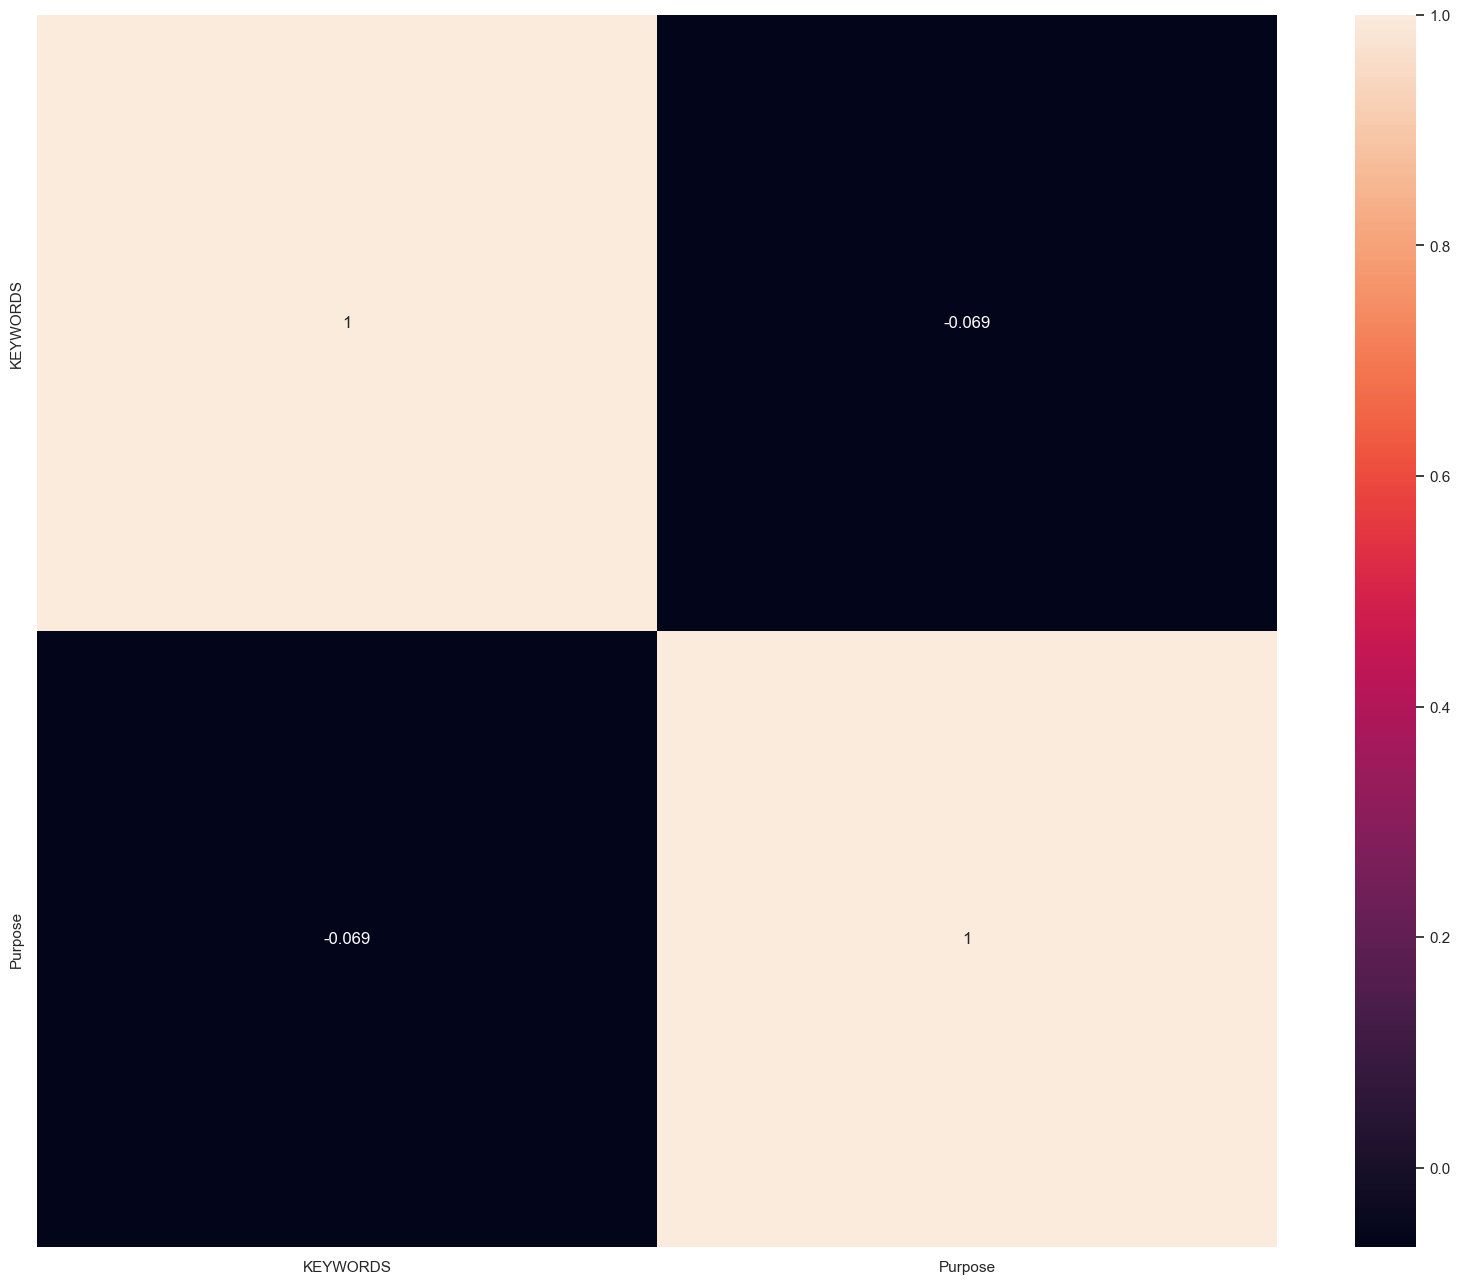

In [17]:
plt.figure(figsize=(20, 16))
sns.heatmap(data.corr(), fmt='0.2g', annot=True)

## DATA SPLITTING

In [19]:
data.head(20)

,KEYWORDS,Purpose
0,181,2
1,2594,2
2,1302,2
3,1187,2
4,1197,2
5,2786,2
6,167,2
7,1066,2
8,2865,2
9,2766,2


In [20]:
x = data.iloc[:,:1]
y = data.iloc[:,1:]


In [21]:
x.columns

Index(['KEYWORDS'], dtype='object')

In [22]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x, y, train_size = 0.8)

In [23]:
print("==================================================")
print("The training length of input is: ", len(x1_train))
print("==================================================")
print("The training length of the output target is: ", len(y1_train))
print("==================================================")
print("The training length of input validation is: ", len(x1_test))
print("==================================================")
print("The training length of the output validation is: ", len(y1_test))
print("==================================================")

The training length of input is:  3216
The training length of the output target is:  3216
The training length of input validation is:  805
The training length of the output validation is:  805


In [24]:
print(x1_train)

      KEYWORDS
1249       293
399        618
1319      1885
1140      3074
2667      3031
...        ...
2299       669
56        1882
503       1298
2724      2379
2023      2041

[3216 rows x 1 columns]


In [25]:
print(y1_test)

      Purpose
2320        7
1461        3
1872        6
2688        1
3634        5
...       ...
1532        6
3990        5
1628        6
1237        3
502         2

[805 rows x 1 columns]


## TRAINING THE MODEL ON DIFFERENT ALGORITHMS

#### CLASSIFICATION ALGORITHMS

In [28]:
# 1. Extra tree classifier
extra_tree_bot = ExtraTreesClassifier()



params_extra_tree = {
    'criterion':['gini','entropy','log_loss'],
    'ccp_alpha': [0.0001,0.003,0.005,0.01],
    'max_depth': [10,20,20,30,40],
    'min_samples_split': [10,20,20,30],
    'random_state':[0,10,16,42]
}



# Grid Search CV
ET_BOT = GridSearchCV(extra_tree_bot,params_extra_tree,cv=5)
ET_BOT.fit(x1_train,y1_train.values.ravel())
ET_BOT.best_params_

{'ccp_alpha': 0.0001,
 'criterion': 'entropy',
 'max_depth': 30,
 'min_samples_split': 10,
 'random_state': 0}

In [29]:
ET_DM_PRED = ET_BOT.predict(x1_test)


#3. Gradient Boosting classifier
# Calculate and print the metrics
accuracy_etc = accuracy_score(y1_test, ET_DM_PRED)
precision_etc = precision_score(y1_test, ET_DM_PRED, average='weighted')
recall_etc = recall_score(y1_test, ET_DM_PRED, average='weighted')
f1_etc = f1_score(y1_test, ET_DM_PRED, average='weighted')

print(f"Accuracy: {accuracy_etc:.2f}")
print(f"Precision: {precision_etc:.2f}")
print(f"Recall: {recall_etc:.2f}")
print(f"F1 Score: {f1_etc:.2f}")

Accuracy: 0.71
Precision: 0.71
Recall: 0.71
F1 Score: 0.70


In [59]:
import pickle
# label_encoder = LabelEncoder()


pickle.dump(ET_BOT, open('ET_BOT.pkl','wb'))

with open('ET_BOT.pkl','rb') as f:
    ET_DM = pickle.load(f)

In [79]:
# Create a DataFrame with the correct feature names
test_data = pd.DataFrame([[400]], columns=x1_train.columns)

# Make predictions
predictions = ET_BOT.predict(test_data)

# Inverse the label encoding
inversed_predictions = label_encoder.inverse_transform(predictions)
print(inversed_predictions)


['Apprenticeships Grant']
